# Fase 1: Importaci√≥n de librer√≠as necesarias

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# ------------------------------
# M√ìDULOS PARA MANIPULACI√ìN Y VISUALIZACI√ìN DE DATOS
# ------------------------------
import numpy as np  # Operaciones num√©ricas de alto rendimiento
import pandas as pd  # Manipulaci√≥n de datos estructurados (opcional si se usa DataFrame)
import matplotlib.pyplot as plt  # Visualizaci√≥n de m√©tricas y resultados
import seaborn as sns  # Visualizaciones m√°s atractivas
import re

# ------------------------------
# M√ìDULOS DE PREPROCESAMIENTO Y UTILIDADES DE KERAS
# ------------------------------
from tensorflow.keras.datasets import imdb  # Dataset IMDB preprocesado de Keras
from tensorflow.keras.preprocessing.sequence import pad_sequences  # Padding para secuencias
from tensorflow.keras.preprocessing.text import Tokenizer  # (Si decides usar texto original en lugar de √≠ndices)
# ------------------------------
# M√ìDULOS PARA DEFINIR EL MODELO EN KERAS
# ------------------------------
from tensorflow.keras.models import Model  # API funcional para modelos complejos
from tensorflow.keras.layers import Input, Embedding, Dense, Dropout, LayerNormalization
from tensorflow.keras.layers import GlobalAveragePooling1D, Add, Embedding
# ------------------------------
# M√ìDULOS DE LA ARQUITECTURA TRANSFORMER (capas de atenci√≥n y m√°s)
# ------------------------------
from tensorflow.keras.layers import MultiHeadAttention  # Mecanismo de atenci√≥n multiparte
from tensorflow.keras.optimizers import Adam  # Optimizador popular en NLP
from tensorflow.keras.losses import BinaryCrossentropy  # P√©rdida para clasificaci√≥n binaria
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.callbacks import TensorBoard, Callback
# ------------------------------
# M√ìDULOS PARA M√âTRICAS Y AN√ÅLISIS
# ------------------------------
from sklearn.metrics import classification_report, confusion_matrix  # M√©tricas de rendimiento
from sklearn.model_selection import train_test_split
# ------------------------------
# UTILIDADES ADICIONALES
# ------------------------------
import tensorflow as tf  # Librer√≠a base para modelos de deep learning
import os  # Para gestionar rutas de guardado de modelos/logs

# Fase 2: Exploraci√≥n del Dataset IMDB

In [ ]:
# Cargamos el dataset IMDB desde Keras.
# Este dataset ya viene tokenizado: las palabras han sido reemplazadas por √≠ndices enteros.
# num_words=10000 indica que se conservar√°n las 10,000 palabras m√°s frecuentes.
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

17464789/17464789 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 0us/step


In [ ]:
# Revisamos la cantidad de muestras en entrenamiento y prueba
print("Tama√±o del set de entrenamiento:", len(X_train))
print("Tama√±o del set de prueba:", len(X_test))

Tama√±o del set de entrenamiento: 25000
Tama√±o del set de prueba: 25000


In [ ]:
# Mostramos una rese√±a en su forma tokenizada (√≠ndices de palabras)
print("Ejemplo de rese√±a (tokenizada):", X_train[0])

# Mostramos la etiqueta asociada (0 = negativa, 1 = positiva)
print("Etiqueta de la rese√±a:", y_train[0])

Ejemplo de rese√±a (tokenizada): [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
Etiqueta de la rese√±a: 1


In [ ]:
# Calculamos la longitud de cada rese√±a
review_lengths = [len(review) for review in X_train]

# Estad√≠sticas descriptivas sobre la longitud de las rese√±as
print("Longitud m√≠nima:", np.min(review_lengths))
print("Longitud m√°xima:", np.max(review_lengths))
print("Longitud promedio:", np.mean(review_lengths))

Longitud m√≠nima: 11
Longitud m√°xima: 2494
Longitud promedio: 238.71364


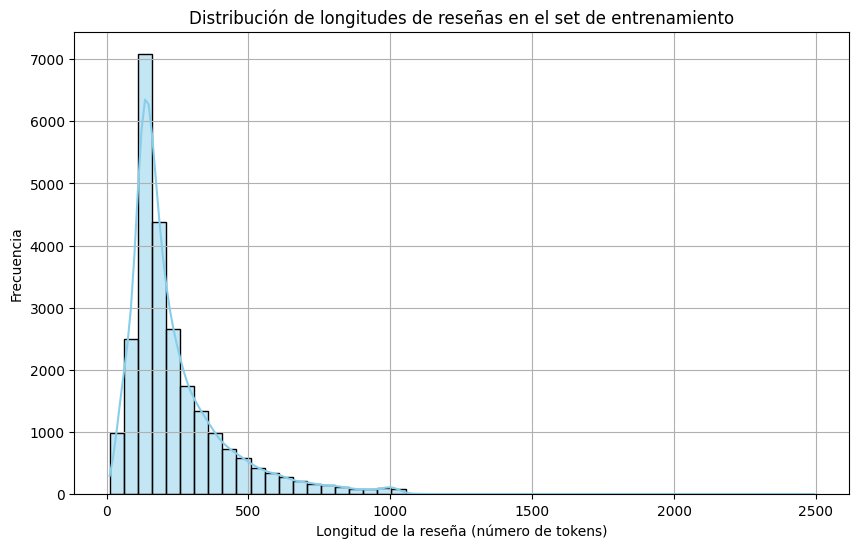

In [ ]:
# Visualizamos la distribuci√≥n de las longitudes para decidir un valor razonable de padding
plt.figure(figsize=(10, 6))
sns.histplot(review_lengths, bins=50, kde=True, color='skyblue')
plt.title("Distribuci√≥n de longitudes de rese√±as en el set de entrenamiento")
plt.xlabel("Longitud de la rese√±a (n√∫mero de tokens)")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

In [ ]:
# Obtenemos el diccionario que mapea palabras a √≠ndices
word_index = imdb.get_word_index()

# Revertimos el diccionario: de √≠ndice a palabra
index_to_word = {index + 3: word for word, index in word_index.items()}
index_to_word[0] = "[PAD]"
index_to_word[1] = "[START]"
index_to_word[2] = "[UNK]"
index_to_word[3] = "[UNUSED]"

# Funci√≥n para decodificar una rese√±a
def decode_review(encoded_review):
    return ' '.join([index_to_word.get(i, "?") for i in encoded_review])

# Visualizamos la rese√±a decodificada
print("Rese√±a decodificada:\n", decode_review(X_train[0]))

1641221/1641221 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 0us/step
Rese√±a decodificada:
 [START] this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert [UNK] is an amazing actor and now the same being director [UNK] father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for [UNK] and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also [UNK] to the two little boy's that played the [UNK] of norman and paul they were just brilliant children are often left out of the [UNK] list i think because the stars that play them all

# Fase 3: Preprocesamiento del Dataset IMDB

Paso 1: Definir la longitud m√°xima de las secuencias

In [ ]:
# Longitud m√°xima de las rese√±as para padding/truncamiento
MAX_LEN = 250  # Puedes ajustarlo si quieres probar con m√°s/menos contexto

Paso 2: Aplicar padding a las secuencias

In [ ]:
# Pad o trunca las rese√±as para que todas tengan la misma longitud
X_train_pad = pad_sequences(X_train, maxlen=MAX_LEN, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test, maxlen=MAX_LEN, padding='post', truncating='post')

# Verificamos que todas las rese√±as ahora tengan la misma longitud
print("Nueva forma de las rese√±as:", X_train_pad.shape)

Nueva forma de las rese√±as: (25000, 250)


Paso 3: Conversi√≥n de etiquetas a float32

In [ ]:
# Convertimos las etiquetas a float32 para compatibilidad con la funci√≥n de p√©rdida
y_train = np.array(y_train).astype("float32")
y_test = np.array(y_test).astype("float32")

Paso 4: Crear un conjunto de validaci√≥n

In [ ]:
# Separamos un peque√±o conjunto de validaci√≥n del set de entrenamiento
X_train_pad, X_val_pad, y_train, y_val = train_test_split(
    X_train_pad, y_train, test_size=0.15, random_state=42)

print("Train shape:", X_train_pad.shape)
print("Validation shape:", X_val_pad.shape)

Train shape: (21250, 250)
Validation shape: (3750, 250)


Paso 5: Revisar una rese√±a tras el padding

In [ ]:
# Mostrar la rese√±a decodificada despu√©s del padding
print("Rese√±a con padding:\n", decode_review(X_train_pad[0]))

Rese√±a con padding:
 [START] i love buying those cheap lousy dvd's from [UNK] video one day i happened to buy this one it's the perfect silly science fiction film of the 50's all [UNK] up [UNK] with [UNK] everything scantily clad girls and plenty of melodrama it's an enjoyable film to those who appreciate this kind of stuff and if you can [UNK] your [UNK] enough you can actually get [UNK] out not just by the psychotic head or by the beating of the thing in the closet but toward the end with the character of 'the perfect [UNK] it's so what's another word for [UNK] ing [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]

## 3.1 Validaci√≥n de los Datos Procesados

1. Verificar la distribuci√≥n de clases (positivas vs negativas)

Negativa: 10686 muestras
Positiva: 10564 muestras


/tmp/ipython-input-14-90149018.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=counts, palette='viridis')


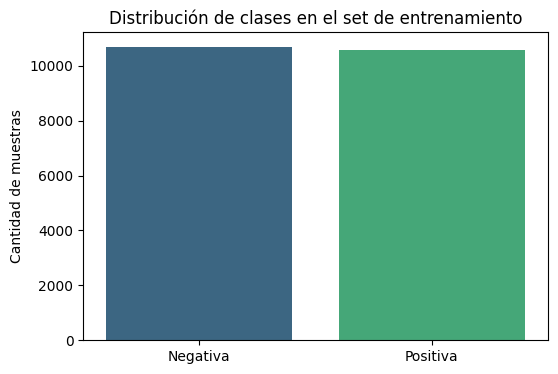

In [ ]:
# Conteo de clases en el set de entrenamiento
unique, counts = np.unique(y_train, return_counts=True)

# Mapeo a etiquetas legibles
labels = ['Negativa', 'Positiva']
for label, count in zip(labels, counts):
    print(f"{label}: {count} muestras")

# Visualizaci√≥n con gr√°fico de barras
plt.figure(figsize=(6, 4))
sns.barplot(x=labels, y=counts, palette='viridis')
plt.title("Distribuci√≥n de clases en el set de entrenamiento")
plt.ylabel("Cantidad de muestras")
plt.show()

2. Confirmar que todas las secuencias tengan el mismo largo

In [ ]:
# Verificamos que todas las secuencias sean de longitud MAX_LEN
train_lengths = [len(seq) for seq in X_train_pad]
print("¬øTodas las rese√±as tienen longitud MAX_LEN?:", all(l == MAX_LEN for l in train_lengths))

¬øTodas las rese√±as tienen longitud MAX_LEN?: True


3. Mostrar un ejemplo post-padding y su etiqueta

In [ ]:
# Seleccionamos una rese√±a y mostramos su contenido
idx = 1
print("Etiqueta:", "Positiva" if y_train[idx] == 1.0 else "Negativa")
print("Secuencia tokenizada (con padding):\n", X_train_pad[idx])

# Decodificamos (excluyendo ceros del padding para mayor claridad)
print("Rese√±a decodificada:\n", decode_review([i for i in X_train_pad[idx] if i != 0]))

Etiqueta: Negativa
Secuencia tokenizada (con padding):
 [   1   48   13 1869  332   27  403   23    4  288 1108   13  115   62
   28 6677   15   14  247    2    5  154 3357  621   16   93   34    6
  132   38 3280 3445   19    4  785  162 2869   11  192    4   22    9
   38  230   39   15   15   13  594   48  145   11    4 4867    5 3352
  162 2869    2   62   28  427 1800   14  552    7   22   45   38   38
 4928    5   12  186    8   28  117    8   81   19   38  111    7   27
  960  108   14  218 2707    6   78  155   43    6   55 1767  155   10
   10   51   13   82  258    6  227 1767   16    4 1166    7 2822   49
    7    4 1989  520   14   22  262   54   50   26   38  111  128  785
 2769   46   50    4  690   11   14   22   71  331   24  572  221    5
    4  105   32  468   38 1904    5 2749   48   13   69    8   67  160
 1026  415   37    2   44   89  254   12    9    8   30 1026   42   79
    6   52 6388 1866   23    6 5417 4267   13   16  170    8    2   10
   10    4 1324  347 

4. Comprobar distribuci√≥n de clases en validaci√≥n y test

In [ ]:
# Validaci√≥n
val_labels, val_counts = np.unique(y_val, return_counts=True)
print("Distribuci√≥n en Validaci√≥n:", dict(zip(val_labels, val_counts)))

# Test
test_labels, test_counts = np.unique(y_test, return_counts=True)
print("Distribuci√≥n en Test:", dict(zip(test_labels, test_counts)))

Distribuci√≥n en Validaci√≥n: {np.float32(0.0): np.int64(1814), np.float32(1.0): np.int64(1936)}
Distribuci√≥n en Test: {np.float32(0.0): np.int64(12500), np.float32(1.0): np.int64(12500)}


5. Confirmar tipos y dimensiones finales

In [ ]:
print("Tipo de datos de X_train_pad:", X_train_pad.dtype)
print("Forma de X_train_pad:", X_train_pad.shape)
print("Forma de y_train:", y_train.shape)

Tipo de datos de X_train_pad: int32
Forma de X_train_pad: (21250, 250)
Forma de y_train: (21250,)


# Fase 4: Dise√±o del Modelo Transformer Encoder-Decoder

In [ ]:
# Dimensiones del modelo Transformer
VOCAB_SIZE = 10000        # N√∫mero de palabras √∫nicas
MAX_LEN = 250             # Longitud m√°xima de las secuencias (ya definido)
EMBED_DIM = 128           # Dimensi√≥n del embedding
NUM_HEADS = 4             # N√∫mero de cabezas de atenci√≥n
FF_DIM = 128              # Dimensi√≥n interna del feed-forward
NUM_ENCODER_BLOCKS = 2    # N√∫mero de bloques en el encoder
NUM_DECODER_BLOCKS = 2    # N√∫mero de bloques en el decoder
DROPOUT_RATE = 0.1

In [ ]:
# Capa de embedding con mask_zero=True para soportar padding
embedding_layer = Embedding(input_dim=VOCAB_SIZE,
                            output_dim=EMBED_DIM,
                            input_length=MAX_LEN,
                            mask_zero=True)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
# Bloque del encoder
def transformer_encoder(inputs):
    # Multi-head self-attention
    attention = MultiHeadAttention(num_heads=NUM_HEADS, key_dim=EMBED_DIM)(inputs, inputs)
    attention = Dropout(DROPOUT_RATE)(attention)
    out1 = LayerNormalization(epsilon=1e-6)(inputs + attention)

    # Feed-forward
    ff = Dense(FF_DIM, activation="relu")(out1)
    ff = Dense(EMBED_DIM)(ff)
    ff = Dropout(DROPOUT_RATE)(ff)
    return LayerNormalization(epsilon=1e-6)(out1 + ff)

# Bloque del decoder (simplificado para clasificaci√≥n)
def transformer_decoder(inputs, encoder_output):
    # Masked self-attention del decoder
    attention1 = MultiHeadAttention(num_heads=NUM_HEADS, key_dim=EMBED_DIM)(inputs, inputs)
    attention1 = Dropout(DROPOUT_RATE)(attention1)
    out1 = LayerNormalization(epsilon=1e-6)(inputs + attention1)

    # Atenci√≥n sobre la salida del encoder
    attention2 = MultiHeadAttention(num_heads=NUM_HEADS, key_dim=EMBED_DIM)(out1, encoder_output)
    attention2 = Dropout(DROPOUT_RATE)(attention2)
    out2 = LayerNormalization(epsilon=1e-6)(out1 + attention2)

    # Feed-forward
    ff = Dense(FF_DIM, activation="relu")(out2)
    ff = Dense(EMBED_DIM)(ff)
    ff = Dropout(DROPOUT_RATE)(ff)
    return LayerNormalization(epsilon=1e-6)(out2 + ff)

In [ ]:
# Input del encoder y decoder
encoder_inputs = Input(shape=(MAX_LEN,), name="encoder_input")
decoder_inputs = Input(shape=(MAX_LEN,), name="decoder_input")

# Embedding compartido para encoder y decoder
x_enc = embedding_layer(encoder_inputs)
x_dec = embedding_layer(decoder_inputs)

# Aplicamos bloques encoder
for _ in range(NUM_ENCODER_BLOCKS):
    x_enc = transformer_encoder(x_enc)

# Aplicamos bloques decoder
for _ in range(NUM_DECODER_BLOCKS):
    x_dec = transformer_decoder(x_dec, x_enc)

# Pooling + Capa de salida
x = GlobalAveragePooling1D()(x_dec)
x = Dropout(DROPOUT_RATE)(x)
outputs = Dense(1, activation="sigmoid")(x)

# Modelo final
transformer_model = Model(inputs=[encoder_inputs, decoder_inputs], outputs=outputs)

In [ ]:
# Resumen del modelo
transformer_model.summary()

Model: "functional"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)        ‚îÉ Output Shape      ‚îÉ    Param # ‚îÉ Connected to      ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ decoder_input       ‚îÇ (None, 250)       ‚îÇ          0 ‚îÇ -                 ‚îÇ
‚îÇ (InputLayer)        ‚îÇ                   ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ encoder_input       ‚îÇ (None, 250)       ‚îÇ          0 ‚îÇ -                 ‚îÇ
‚îÇ (InputLayer)        ‚îÇ                   ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ embedding           ‚îÇ (None, 250, 128)  ‚îÇ  1,280,000 ‚îÇ encoder_input[0]‚Ä¶ ‚îÇ
‚îÇ (Embedding)         ‚îÇ                   ‚îÇ            ‚îÇ decoder_input[0]‚Ä¶ ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ not_equal           ‚îÇ (None, 250)       ‚îÇ          0 ‚îÇ encoder_input[0]‚Ä¶ ‚îÇ
‚îÇ (NotEqual)          ‚îÇ                   ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ multi_head_attenti‚Ä¶ ‚îÇ (None, 250, 128)  ‚îÇ    263,808 ‚îÇ embedding[0][0],  ‚îÇ
‚îÇ (MultiHeadAttentio‚Ä¶ ‚îÇ                   ‚îÇ            ‚îÇ embedding[0][0],  ‚îÇ
‚îÇ                     ‚îÇ                   ‚îÇ            ‚îÇ not_equal[0][0],  ‚îÇ
‚îÇ                     ‚îÇ                   ‚îÇ            ‚îÇ not_equal[0][0]   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_1 (Dropout) ‚îÇ (None, 250, 128)  ‚îÇ          0 ‚îÇ multi_head_atten‚Ä¶ ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ add (Add)           ‚îÇ (None, 250, 128)  ‚îÇ          0 ‚îÇ embedding[0][0],  ‚îÇ
‚îÇ                     ‚îÇ                   ‚îÇ            ‚îÇ dropout_1[0][0]   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ layer_normalization ‚îÇ (None, 250, 128)  ‚îÇ        256 ‚îÇ add[0][0]         ‚îÇ
‚îÇ (LayerNormalizatio‚Ä¶ ‚îÇ                   ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense (Dense)       ‚îÇ (None, 250, 128)  ‚îÇ     16,512 ‚îÇ layer_normalizat‚Ä¶ ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î

 Total params: 2,997,633 (11.44 MB)

 Trainable params: 2,997,633 (11.44 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
transformer_model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss=BinaryCrossentropy(),
    metrics=["accuracy"]
)

# Fase 5: Entrenamiento del Modelo Transformer

In [ ]:
# Rutas definidas
CHECKPOINT_DIR = "/content/drive/MyDrive/Transformer/Checkpoint"
LOG_DIR = "/content/drive/MyDrive/Transformer/Log"
CHECKPOINT_PATH = os.path.join(CHECKPOINT_DIR, "best_model.h5")
EPOCH_TRACKER_PATH = os.path.join(CHECKPOINT_DIR, "last_epoch.txt")

In [ ]:
# ‚ö†Ô∏è Validaci√≥n robusta de existencia y contenido
def is_checkpoint_valid(model_path):
    return os.path.isfile(model_path) and os.path.getsize(model_path) > 0

def is_epoch_file_valid(epoch_path):
    return os.path.isfile(epoch_path) and os.path.getsize(epoch_path) > 0

# Epoch inicial
initial_epoch = 0

# Cargar pesos si ambos archivos son v√°lidos
if is_checkpoint_valid(CHECKPOINT_PATH) and is_epoch_file_valid(EPOCH_TRACKER_PATH):
    try:
        print("‚úÖ Checkpoint encontrado. Intentando cargar pesos del modelo...")
        transformer_model.load_weights(CHECKPOINT_PATH)
        with open(EPOCH_TRACKER_PATH, "r") as f:
            initial_epoch = int(f.read().strip()) + 1
        print(f"Reanudando desde la √©poca {initial_epoch}")
    except Exception as e:
        print("‚ö†Ô∏è Error al cargar los pesos del checkpoint. Se ignorar√° y se entrenar√° desde cero.")
        print(f"Detalles del error: {e}")
        initial_epoch = 0
else:
    print("‚ÑπÔ∏è No se encontr√≥ checkpoint v√°lido. Entrenamiento comenzar√° desde la √©poca 0.")

‚ÑπÔ∏è No se encontr√≥ checkpoint v√°lido. Entrenamiento comenzar√° desde la √©poca 0.


In [ ]:
# Callback personalizado para guardar el n√∫mero de la √∫ltima √©poca completada
class EpochTrackerCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        with open(EPOCH_TRACKER_PATH, "w") as f:
            f.write(str(epoch))

callbacks = [
    EarlyStopping(monitor="val_loss", patience=2, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=2, min_lr=1e-6, verbose=1),
    ModelCheckpoint(
        filepath=CHECKPOINT_PATH,
        monitor="val_loss",
        save_best_only=True,
        verbose=1
    ),
    TensorBoard(log_dir=LOG_DIR),
    EpochTrackerCallback()
]

In [ ]:
history = transformer_model.fit(
    [X_train_pad, X_train_pad],   # input_encoder, input_decoder
    y_train,
    validation_data=([X_val_pad, X_val_pad], y_val),
    epochs=60,
    initial_epoch=initial_epoch,
    batch_size=64,
    callbacks=callbacks
)

Epoch 1/60
333/333 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 185ms/step - accuracy: 0.6553 - loss: 0.5878
Epoch 1: val_loss improved from inf to 0.34477, saving model to /content/drive/MyDrive/Transformer/Checkpoint/best_model.h5


333/333 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 96s 205ms/step - accuracy: 0.6556 - loss: 0.5874 - val_accuracy: 0.8509 - val_loss: 0.3448 - learning_rate: 1.0000e-04
Epoch 2/60
332/333 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 155ms/step - accuracy: 0.9009 - loss: 0.2524
Epoch 2: val_loss improved from 0.34477 to 0.31059, saving model to /content/drive/MyDrive/Transformer/Checkpoint/best_model.h5


333/333 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 115s 167ms/step - accuracy: 0.9009 - loss: 0.2524 - val_accuracy: 0.8688 - val_loss: 0.3106 - learning_rate: 1.0000e-04
Epoch 3/60
332/333 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 155ms/step - accuracy: 0.9324 - loss: 0.1841
Epoch 3: val_loss did not improve from 0.31059
333/333 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 80s 163ms/step - accuracy: 0.9324 - loss: 0.1842 - val_accuracy: 0.8707 - val_loss: 0.3344 - learning_rate: 1.0000e-04
Epoch 4/60
332/333 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 155ms/step - accuracy: 0.9523 - loss: 0.1377
Epoch 4: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.

Epoch 4: val_loss did not improve from 0.31059
333/333 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 84s 170ms/step - accuracy: 0.9523 - loss: 0.1377 - val_accuracy: 0.8440 - val_loss: 0.4359 - learning_rate: 1.0000e-04
Epoch 4:

# Fase 6: Evaluaci√≥n del Modelo

In [ ]:
# Cargar los mejores pesos del entrenamiento
transformer_model.load_weights("/content/drive/MyDrive/Transformer/Checkpoint/best_model.h5")
print("‚úÖ Pesos del mejor modelo cargados exitosamente.")

‚úÖ Pesos del mejor modelo cargados exitosamente.


In [ ]:
# Evaluaci√≥n del modelo en el conjunto de test
test_loss, test_accuracy = transformer_model.evaluate([X_test_pad, X_test_pad], y_test, verbose=1)
print(f"üìä Evaluaci√≥n en test - Accuracy: {test_accuracy:.4f} | Loss: {test_loss:.4f}")

782/782 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 23s 27ms/step - accuracy: 0.8571 - loss: 0.3339
üìä Evaluaci√≥n en test - Accuracy: 0.8578 | Loss: 0.3344


782/782 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 23s 27ms/step
üìã Reporte de Clasificaci√≥n:

              precision    recall  f1-score   support

    Negativa       0.82      0.91      0.86     12500
    Positiva       0.90      0.81      0.85     12500

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000



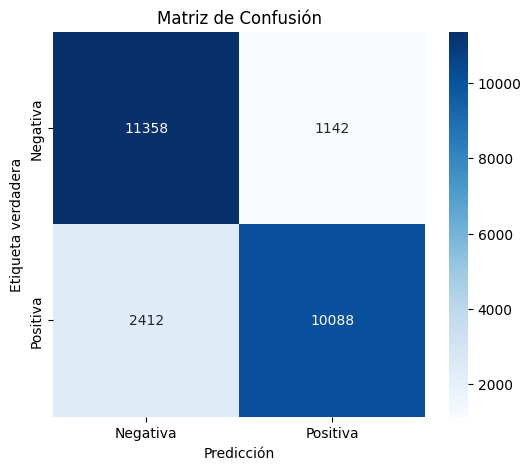

In [ ]:
# Predicciones (probabilidades)
y_pred_prob = transformer_model.predict([X_test_pad, X_test_pad])
# Convertir a clases (0 o 1)
y_pred = (y_pred_prob >= 0.5).astype(int)

# Reporte de clasificaci√≥n
print("üìã Reporte de Clasificaci√≥n:\n")
print(classification_report(y_test, y_pred, target_names=["Negativa", "Positiva"]))

# Matriz de confusi√≥n
cm = confusion_matrix(y_test, y_pred)

# Visualizaci√≥n
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Negativa", "Positiva"], yticklabels=["Negativa", "Positiva"])
plt.xlabel("Predicci√≥n")
plt.ylabel("Etiqueta verdadera")
plt.title("Matriz de Confusi√≥n")
plt.show()

/tmp/ipython-input-32-2417583913.py:11: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


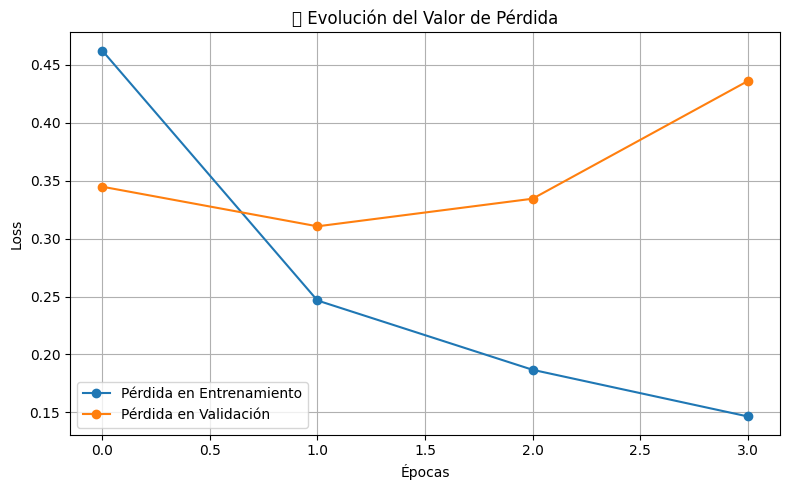

In [ ]:
# Gr√°fico del valor de p√©rdida durante el entrenamiento
def plot_loss(history):
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['loss'], label='P√©rdida en Entrenamiento', marker='o')
    plt.plot(history.history['val_loss'], label='P√©rdida en Validaci√≥n', marker='o')
    plt.title('üìâ Evoluci√≥n del Valor de P√©rdida')
    plt.xlabel('√âpocas')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Llamamos a la funci√≥n
plot_loss(history)

In [ ]:
# Si est√°s en Google Colab, ejecuta esta celda para cargar el tablero de TensorBoard
%load_ext tensorboard
%tensorboard --logdir /content/drive/MyDrive/Transformer/Log

<IPython.core.display.Javascript object>

# Fase 7 predicciones

In [ ]:
# Reconstruye el modelo exactamente igual que durante el entrenamiento
# (con los bloques encoder, decoder, embeddings, pooling y dem√°s definidos)

transformer_model.load_weights("/content/drive/MyDrive/Transformer/Checkpoint/best_model.h5")
print("‚úÖ Modelo cargado correctamente.")

‚úÖ Modelo cargado correctamente.


In [ ]:
sample_reviews = [
    "This movie was a masterpiece with stunning visuals and strong performances",
    "Absolutely terrible. I can't believe I wasted two hours on this",
    "It was okay, not bad but not great either",
    "One of the best films I've seen in years!",
    "The plot made no sense and the acting was wooden",
    "I laughed, I cried, and I loved every minute of it",
    "Completely overrated. Don't understand the hype",
    "An emotional rollercoaster with brilliant writing",
    "Boring and predictable from start to finish",
    "This is a bad movie"
]

In [ ]:
# Cargar diccionario de palabras
word_index = imdb.get_word_index()
word_index = {k: (v + 3) for k, v in word_index.items()}
word_index["[PAD]"] = 0
word_index["[START]"] = 1
word_index["[UNK]"] = 2
word_index["[UNUSED]"] = 3

def encode_review(text, max_len=250):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    tokens = text.split()
    encoded = [1]  # [START]
    for word in tokens:
        encoded.append(word_index.get(word, 2))
    padded = pad_sequences([encoded], maxlen=max_len, padding='post', truncating='post')
    return padded

In [ ]:
print("üîç PREDICCIONES DETALLADAS DEL MODELO TRANSFORMER:\n")

for i, review in enumerate(sample_reviews):
    encoded = encode_review(review, max_len=250)
    prediction = transformer_model.predict([encoded, encoded])[0][0]
    predicted_class = int(prediction >= 0.5)

    predicted_sentiment = "Positiva ‚úÖ" if predicted_class == 1 else "Negativa ‚ùå"
    probability_percent = prediction * 100  # Convertimos a porcentaje

    print(f"{i+1}. Rese√±a: \"{review}\"\n")
    print(f"   üü© Predicci√≥n del modelo: {predicted_sentiment}")
    print(f"   üìä Probabilidad: {probability_percent:.2f}%\n")


üîç PREDICCIONES DETALLADAS DEL MODELO TRANSFORMER:

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 35ms/step
1. Rese√±a: "This movie was a masterpiece with stunning visuals and strong performances"

   üü© Predicci√≥n del modelo: Positiva ‚úÖ
   üìä Probabilidad: 99.95%

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 41ms/step
2. Rese√±a: "Absolutely terrible. I can't believe I wasted two hours on this"

   üü© Predicci√≥n del modelo: Negativa ‚ùå
   üìä Probabilidad: 0.26%

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 32ms/step
3. Rese√±a: "It was okay, not bad but not great either"

   üü© Predicci√≥n del modelo: Negativa ‚ùå
   üìä Probabilidad: 1.18%

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 32ms/step
4. Rese√±a: "One of the best films I've seen in years!"

   üü© Predicci√≥n del modelo: Positiva ‚úÖ
   üìä Probabilidad: 99.94%

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚

# Fase 8: Exploraci√≥n del Dataset Fashion-MNIST

## Carga del dataset de im√°genes (Fashion-MNIST).

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

# Cargar el dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Ver las dimensiones de los datos
print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y_test:", y_test.shape)

29515/29515 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 0us/step
26421880/26421880 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 0us/step
5148/5148 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 0us/step
4422102/4422102 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 0us/step
Forma de X_train: (60000, 28, 28)
Forma de X_test: (10000, 28, 28)
Forma de y_train: (60000,)
Forma de y_test: (10000,)


## Exploraci√≥n visual de algunas im√°genes

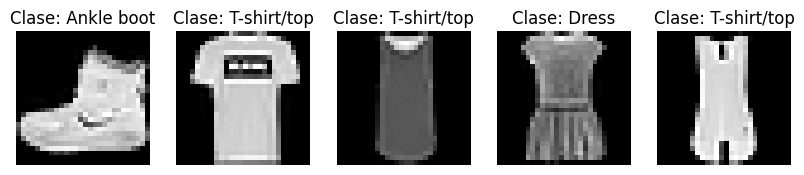

In [ ]:
import matplotlib.pyplot as plt

# Mostrar algunas im√°genes
def plot_images(X, y, labels, num_images=5):
    plt.figure(figsize=(10, 5))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(X[i], cmap="gray")
        plt.title(f"Clase: {labels[y[i]]}")
        plt.axis('off')
    plt.show()

# Etiquetas de las clases
labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Visualizar las primeras 5 im√°genes
plot_images(X_train, y_train, labels)

## Preprocesamiento de los datos

In [ ]:
# Normalizaci√≥n de las im√°genes
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Verificaci√≥n de la normalizaci√≥n (deber√≠an estar entre 0 y 1)
print("Valor m√°ximo de X_train:", X_train.max())
print("Valor m√≠nimo de X_train:", X_train.min())

Valor m√°ximo de X_train: 1.0
Valor m√≠nimo de X_train: 0.0


In [ ]:
# Redimensionar para que el formato sea (num_samples, 28, 28, 1)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Verificaci√≥n de la nueva forma
print("Nueva forma de X_train:", X_train.shape)
print("Nueva forma de X_test:", X_test.shape)

Nueva forma de X_train: (60000, 28, 28, 1)
Nueva forma de X_test: (10000, 28, 28, 1)


In [ ]:
from tensorflow.keras.utils import to_categorical

# Codificaci√≥n one-hot de las etiquetas
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Verificaci√≥n de la codificaci√≥n
print("Primeras etiquetas codificadas:", y_train[:5])

Primeras etiquetas codificadas: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


# Fase 9: Dise√±o de la Arquitectura del Modelo CNN

## Definici√≥n de la arquitectura de la red convolucional (CNN)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Definir la arquitectura del modelo CNN
model = Sequential()

# Capa convolucional 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))

# Capa convolucional 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Capa convolucional 3
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Aplanado de la salida
model.add(Flatten())

# Capa densa completamente conectada
model.add(Dense(128, activation='relu'))

# Capa de Dropout para evitar overfitting
model.add(Dropout(0.5))

# Capa de salida (10 clases)
model.add(Dense(10, activation='softmax'))

# Resumen del modelo
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ conv2d (Conv2D)                 ‚îÇ (None, 26, 26, 32)     ‚îÇ           320 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d (MaxPooling2D)    ‚îÇ (None, 13, 13, 32)     ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_1 (Conv2D)               ‚îÇ (None, 11, 11, 64)     ‚îÇ        18,496 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_1 (MaxPooling2D)  ‚îÇ (None, 5, 5, 64)       ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_2 (Conv2D)               ‚îÇ (None, 3, 3, 128)      ‚îÇ        73,856 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_2 (MaxPooling2D)  ‚îÇ (None, 1, 1, 128)      ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ flatten (Flatten)               ‚îÇ (None, 128)            ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense (Dense)                   ‚îÇ (None, 128)            ‚îÇ        16,512 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout (Dropout)               ‚îÇ (None, 128)            ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_1 (Dense)                 ‚îÇ (None, 10)             ‚îÇ         1,290 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 110,474 (431.54 KB)

 Trainable params: 110,474 (431.54 KB)

 Non-trainable params: 0 (0.00 B)

# Fase 10: Entrenamiento del Modelo CNN

## Preparaci√≥n para el entrenamiento

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard

# Compilaci√≥n del modelo con la funci√≥n de p√©rdida correcta
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss=CategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)


## Definir los Callbacks

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Directorios para guardar los modelos y logs
CHECKPOINT_DIR = "/content/drive/MyDrive/Modelo CNN/checkpoints"
LOG_DIR = "/content/drive/MyDrive/Modelo CNN/logs"

# Callback para guardar el mejor modelo
checkpoint_callback = ModelCheckpoint(
    filepath=f"{CHECKPOINT_DIR}/best_model.h5",
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

# Callback para detener el entrenamiento si no hay mejoras
early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=3,  # N√∫mero de √©pocas sin mejora antes de parar
    restore_best_weights=True,
    verbose=1
)

# Callback para TensorBoard
tensorboard_callback = TensorBoard(
    log_dir=LOG_DIR,
    histogram_freq=1,
    write_graph=True
)

## Entrenar el Modelo

In [ ]:
# Entrenamiento del modelo
history_cnn = model.fit(
    X_train, y_train,  # Datos de entrenamiento
    validation_data=(X_test, y_test),  # Datos de validaci√≥n
    epochs=30,  # N√∫mero de √©pocas
    batch_size=64,  # Tama√±o del batch
    callbacks=[checkpoint_callback, early_stopping_callback, tensorboard_callback]
)

Epoch 1/30
938/938 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 6ms/step - accuracy: 0.6417 - loss: 0.9738
Epoch 1: val_loss improved from inf to 0.49951, saving model to /content/drive/MyDrive/Modelo CNN/checkpoints/best_model.h5


938/938 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13s 8ms/step - accuracy: 0.6418 - loss: 0.9735 - val_accuracy: 0.8081 - val_loss: 0.4995
Epoch 2/30
930/938 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 5ms/step - accuracy: 0.8245 - loss: 0.4860
Epoch 2: val_loss improved from 0.49951 to 0.40828, saving model to /content/drive/MyDrive/Modelo CNN/checkpoints/best_model.h5


938/938 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 15s 6ms/step - accuracy: 0.8246 - loss: 0.4858 - val_accuracy: 0.8483 - val_loss: 0.4083
Epoch 3/30
927/938 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - accuracy: 0.8553 - loss: 0.4045
Epoch 3: val_loss improved from 0.40828 to 0.36573, saving model to /content/drive/MyDrive/Modelo CNN/checkpoints/best_model.h5


938/938 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 5ms/step - accuracy: 0.8553 - loss: 0.4044 - val_accuracy: 0.8668 - val_loss: 0.3657
Epoch 4/30
937/938 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - accuracy: 0.8683 - loss: 0.3637
Epoch 4: val_loss improved from 0.36573 to 0.34029, saving model to /content/drive/MyDrive/Modelo CNN/checkpoints/best_model.h5


938/938 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 5ms/step - accuracy: 0.8683 - loss: 0.3637 - val_accuracy: 0.8761 - val_loss: 0.3403
Epoch 5/30
926/938 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 5ms/step - accuracy: 0.8777 - loss: 0.3344
Epoch 5: val_loss did not improve from 0.34029
938/938 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 6ms/step - accuracy: 0.8778 - loss: 0.3343 - val_accuracy: 0.8742 - val_loss: 0.3427
Epoch 6/30
938/938 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - accuracy: 0.8891 - loss: 0.3066
Epoch 6: val_loss improved from 0.34029 to 0.32448, saving model to /content/drive/MyDrive/Modelo CNN/checkpoints/best_model.h5


938/938 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 5ms/step - accuracy: 0.8891 - loss: 0.3066 - val_accuracy: 0.8780 - val_loss: 0.3245
Epoch 7/30
934/938 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 5ms/step - accuracy: 0.8994 - loss: 0.2788
Epoch 7: val_loss improved from 0.32448 to 0.31536, saving model to /content/drive/MyDrive/Modelo CNN/checkpoints/best_model.h5


938/938 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 6ms/step - accuracy: 0.8994 - loss: 0.2788 - val_accuracy: 0.8877 - val_loss: 0.3154
Epoch 8/30
928/938 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - accuracy: 0.9041 - loss: 0.2619
Epoch 8: val_loss improved from 0.31536 to 0.31226, saving model to /content/drive/MyDrive/Modelo CNN/checkpoints/best_model.h5


938/938 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 5ms/step - accuracy: 0.9041 - loss: 0.2619 - val_accuracy: 0.8890 - val_loss: 0.3123
Epoch 9/30
937/938 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - accuracy: 0.9132 - loss: 0.2395
Epoch 9: val_loss improved from 0.31226 to 0.30478, saving model to /content/drive/MyDrive/Modelo CNN/checkpoints/best_model.h5


938/938 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 5ms/step - accuracy: 0.9132 - loss: 0.2396 - val_accuracy: 0.8917 - val_loss: 0.3048
Epoch 10/30
927/938 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 5ms/step - accuracy: 0.9166 - loss: 0.2284
Epoch 10: val_loss did not improve from 0.30478
938/938 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 6ms/step - accuracy: 0.9166 - loss: 0.2284 - val_accuracy: 0.8929 - val_loss: 0.3209
Epoch 11/30
934/938 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 5ms/step - accuracy: 0.9217 - loss: 0.2132
Epoch 11: val_loss improved from 0.30478 to 0.30063, saving model to /content/drive/MyDrive/Modelo CNN/checkpoints/best_model.h5


938/938 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 6ms/step - accuracy: 0.9217 - loss: 0.2133 - val_accuracy: 0.8952 - val_loss: 0.3006
Epoch 12/30
931/938 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - accuracy: 0.9238 - loss: 0.2049
Epoch 12: val_loss did not improve from 0.30063
938/938 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 5ms/step - accuracy: 0.9238 - loss: 0.2049 - val_accuracy: 0.8939 - val_loss: 0.3127
Epoch 13/30
928/938 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 5ms/step - accuracy: 0.9298 - loss: 0.1933
Epoch 13: val_loss did not improve from 0.30063
938/938 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 6ms/step - accuracy: 0.9298 - loss: 0.1934 - val_accuracy: 0.8914 - val_loss: 0.3161
Epoch 14/30
935/938 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - accuracy: 0.9308 - loss: 0.1836
Epoch 14: val_loss did not improve from 0.30063
938

# Fase 11: Evaluaci√≥n del Modelo CNN

## Evaluaci√≥n del modelo en el conjunto de test

In [ ]:
# Evaluaci√≥n del modelo en el conjunto de test
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"üìä Evaluaci√≥n en test - Accuracy: {test_accuracy:.4f} | Loss: {test_loss:.4f}")

313/313 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 4ms/step - accuracy: 0.8931 - loss: 0.3110
üìä Evaluaci√≥n en test - Accuracy: 0.8952 | Loss: 0.3006


## An√°lisis de m√©tricas

In [ ]:
from sklearn.metrics import classification_report

# Obtener las predicciones
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)  # Convertir probabilidades a clases

# Reporte de clasificaci√≥n
print("üìã Reporte de Clasificaci√≥n:\n")
print(classification_report(np.argmax(y_test, axis=1), y_pred, target_names=labels))

313/313 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 2ms/step
üìã Reporte de Clasificaci√≥n:

              precision    recall  f1-score   support

 T-shirt/top       0.89      0.78      0.83      1000
     Trouser       1.00      0.97      0.98      1000
    Pullover       0.85      0.83      0.84      1000
       Dress       0.84      0.93      0.88      1000
        Coat       0.82      0.86      0.84      1000
      Sandal       0.98      0.97      0.98      1000
       Shirt       0.70      0.72      0.71      1000
     Sneaker       0.94      0.98      0.96      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.98      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



## Visualizaci√≥n de resultados

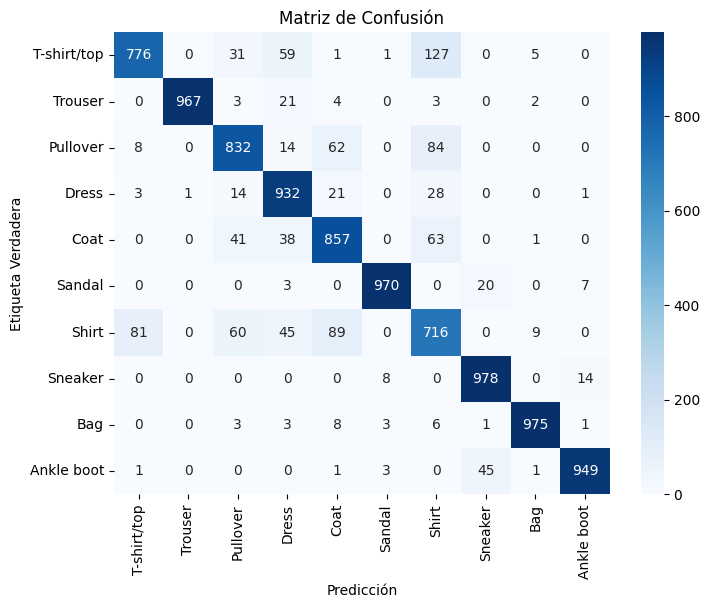

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de confusi√≥n
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)

# Visualizaci√≥n de la matriz de confusi√≥n
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicci√≥n")
plt.ylabel("Etiqueta Verdadera")
plt.title("Matriz de Confusi√≥n")
plt.show()

/tmp/ipython-input-24-3940220300.py:11: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


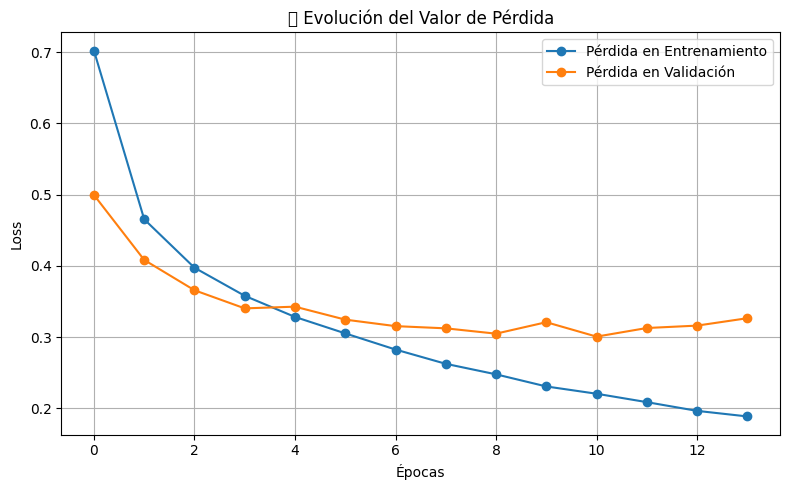

In [ ]:
# Gr√°fico del valor de p√©rdida durante el entrenamiento
def plot_loss(history):
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['loss'], label='P√©rdida en Entrenamiento', marker='o')
    plt.plot(history.history['val_loss'], label='P√©rdida en Validaci√≥n', marker='o')
    plt.title('üìâ Evoluci√≥n del Valor de P√©rdida')
    plt.xlabel('√âpocas')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Llamamos a la funci√≥n para visualizar el gr√°fico
plot_loss(history_cnn)

# Fase 12: Ajuste de Hiperpar√°metros y Regularizaci√≥n

## Ajuste de hiperpar√°metros del modelo

In [ ]:
# Definir la arquitectura del modelo CNN con BatchNormalization
model = Sequential()

# Capa convolucional 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(BatchNormalization())  # Normalizaci√≥n por lotes
model.add(MaxPooling2D((2, 2)))

# Capa convolucional 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())  # Normalizaci√≥n por lotes
model.add(MaxPooling2D((2, 2)))

# Capa convolucional 3
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())  # Normalizaci√≥n por lotes
model.add(MaxPooling2D((2, 2)))

# Aplanado de la salida
model.add(Flatten())

# Capa densa completamente conectada
model.add(Dense(128, activation='relu'))

# Capa de Dropout
model.add(Dropout(0.5))

# Capa de salida (10 clases)
model.add(Dense(10, activation='softmax'))

## Regularizaci√≥n

In [ ]:
# Ahora compilamos el modelo despu√©s de definir su arquitectura
model.compile(
    optimizer=Adam(learning_rate=0.001),  # Ajustar el learning rate
    loss=CategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

## Entrenamiento con nuevos parametros

In [ ]:
history_cnn_new = model.fit(
    X_train, y_train,  # Datos de entrenamiento
    validation_data=(X_test, y_test),  # Datos de validaci√≥n
    epochs=30,  # N√∫mero de √©pocas ajustado
    batch_size=64,  # Tama√±o del batch ajustado
    callbacks=[checkpoint_callback, early_stopping_callback, tensorboard_callback]
)

Epoch 1/30
938/938 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 7ms/step - accuracy: 0.7503 - loss: 0.7319
Epoch 1: val_loss did not improve from 0.30063
938/938 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 15s 8ms/step - accuracy: 0.7503 - loss: 0.7317 - val_accuracy: 0.8564 - val_loss: 0.4074
Epoch 2/30
935/938 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 5ms/step - accuracy: 0.8615 - loss: 0.3862
Epoch 2: val_loss did not improve from 0.30063
938/938 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 16s 6ms/step - accuracy: 0.8615 - loss: 0.3862 - val_accuracy: 0.8474 - val_loss: 0.3981
Epoch 3/30
937/938 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 5ms/step - accuracy: 0.8785 - loss: 0.3339
Epoch 3: val_loss did not improve from 0.30063
938/938 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 5ms/step - accuracy: 0.8785 - loss: 0.3339 - val_accuracy: 0.8783 - val_loss: 0.3312
Epoch 4

# Fase 13: Predicciones y Reporte Final

## Generaci√≥n de predicciones sobre nuevas im√°genes

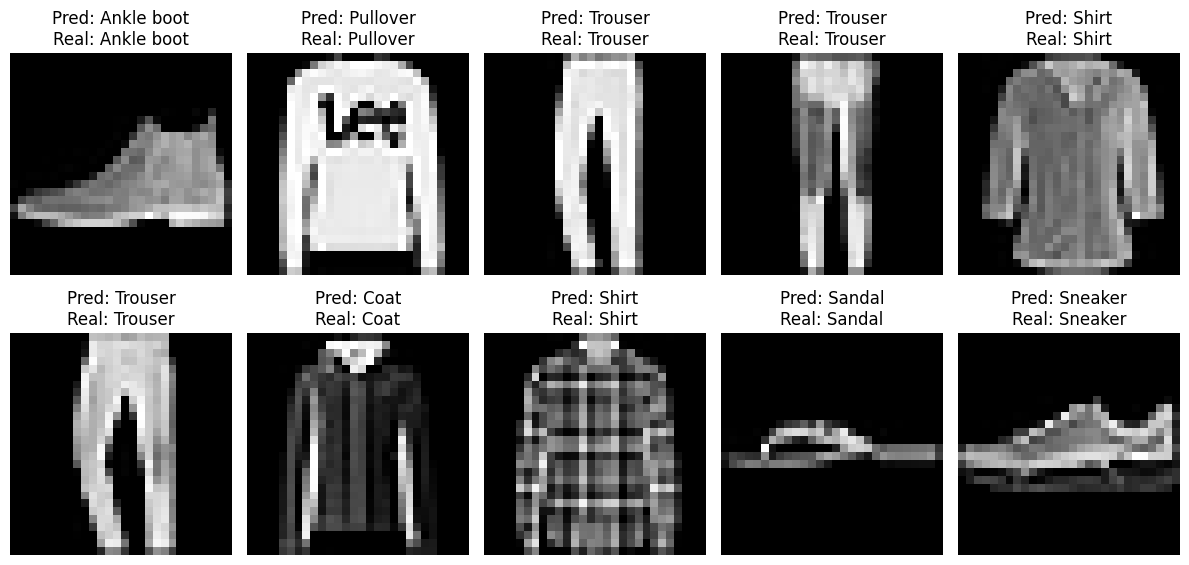

In [ ]:
import matplotlib.pyplot as plt

# Funci√≥n para mostrar im√°genes junto con las predicciones y las clases reales
def plot_images_with_predictions(X, y_true, y_pred, labels, num_images=10):
    plt.figure(figsize=(12, 6))
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)  # 2 filas, 5 columnas
        plt.imshow(X[i].reshape(28, 28), cmap='gray')  # Redimensionamos la imagen a 28x28
        plt.title(f"Pred: {labels[y_pred[i]]}\nReal: {labels[np.argmax(y_true[i])]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Mostrar las primeras 10 im√°genes con las predicciones y clases reales
plot_images_with_predictions(X_test, y_test, y_pred, labels, num_images=10)

## Reporte de Clasificaci√≥n

In [ ]:
from sklearn.metrics import classification_report

# Reporte de clasificaci√≥n
print("üìã Reporte de Clasificaci√≥n:\n")
print(classification_report(np.argmax(y_test, axis=1), y_pred, target_names=labels))

üìã Reporte de Clasificaci√≥n:

              precision    recall  f1-score   support

 T-shirt/top       0.82      0.86      0.84      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.76      0.87      0.81      1000
       Dress       0.87      0.90      0.88      1000
        Coat       0.87      0.70      0.78      1000
      Sandal       0.97      0.96      0.97      1000
       Shirt       0.68      0.64      0.66      1000
     Sneaker       0.92      0.97      0.94      1000
         Bag       0.96      0.97      0.97      1000
  Ankle boot       0.97      0.93      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



## Matriz de Confusi√≥n

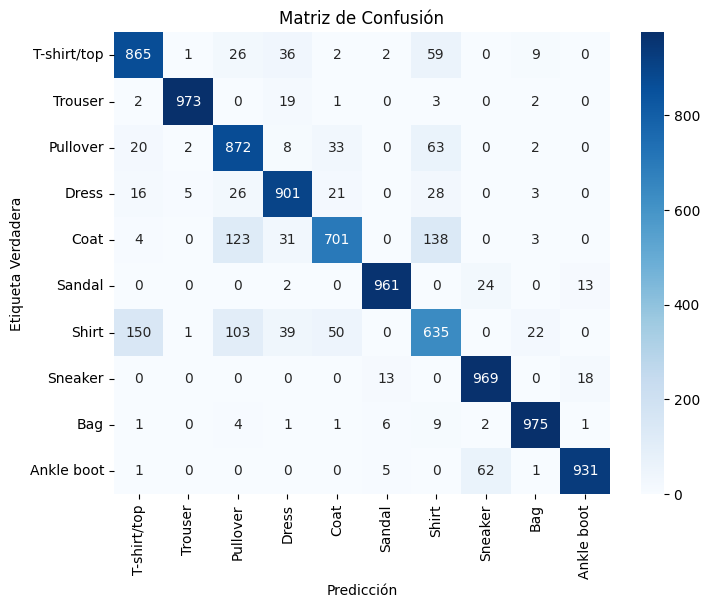

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de confusi√≥n
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)

# Visualizaci√≥n de la matriz de confusi√≥n
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicci√≥n")
plt.ylabel("Etiqueta Verdadera")
plt.title("Matriz de Confusi√≥n")
plt.show()

## Gr√°fico de la Evoluci√≥n de la P√©rdida

/tmp/ipython-input-38-1574992072.py:11: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


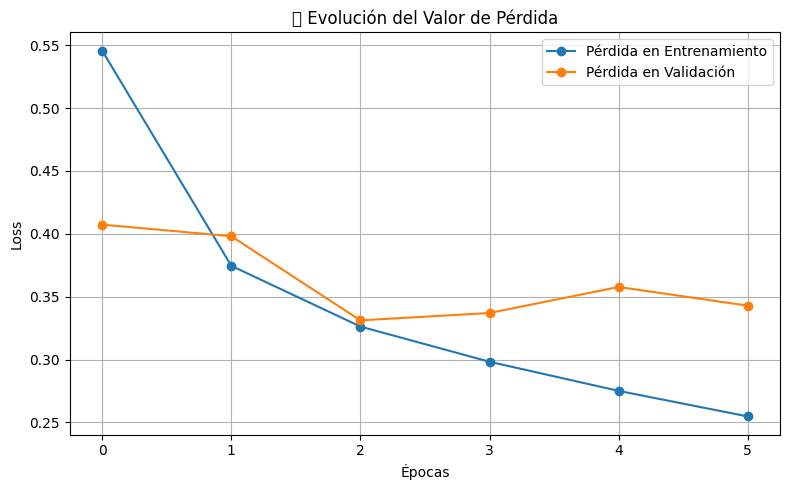

In [ ]:
# Gr√°fico del valor de p√©rdida durante el entrenamiento
def plot_loss(history):
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['loss'], label='P√©rdida en Entrenamiento', marker='o')
    plt.plot(history.history['val_loss'], label='P√©rdida en Validaci√≥n', marker='o')
    plt.title('üìâ Evoluci√≥n del Valor de P√©rdida')
    plt.xlabel('√âpocas')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Llamamos a la funci√≥n para visualizar el gr√°fico
plot_loss(history_cnn_new)

## Guardar modelo final

In [ ]:
# Guardar el modelo entrenado
model.save('/content/drive/MyDrive/Modelo CNN/modelo/fashion_mnist_cnn_model.h5')

print("Modelo guardado exitosamente.")

Modelo guardado exitosamente.


## Codigo para carga modelo guardado (Solo referencial)

In [ ]:
from tensorflow.keras.models import load_model

# Cargar el modelo previamente guardado
loaded_model = load_model('/content/drive/MyDrive/Modelo CNN/modelo/fashion_mnist_cnn_model.h5')

print("Modelo cargado exitosamente.")

# Fase 14: Evaluaci√≥n con imagenes reales por usuario

## Implementaci√≥n Gradio

In [ ]:
pip install gradio

In [ ]:
import gradio as gr
import numpy as np
from tensorflow.keras.models import load_model
from PIL import Image

# Cargar el modelo guardado
model = load_model('/content/drive/MyDrive/Modelo CNN/modelo/fashion_mnist_cnn_model.h5')

# Funci√≥n para preprocesar la imagen y hacer la predicci√≥n
def predict_image(img):
    try:
        # Verificar si la entrada es None
        if img is None:
            return "Error: No se ha proporcionado ninguna imagen"

        # Convertir a PIL Image si es necesario
        if isinstance(img, np.ndarray):
            # Si es un array numpy, convertirlo a PIL Image
            img = Image.fromarray(img.astype('uint8'))

        # Convertir a escala de grises
        if img.mode != 'L':
            img = img.convert('L')

        # Redimensionar a 28x28 p√≠xeles
        img = img.resize((28, 28), Image.Resampling.LANCZOS)

        # Convertir a array numpy
        img_array = np.array(img)

        # Verificar el tama√±o del array
        print(f"Tama√±o de la imagen procesada: {img_array.shape}")

        # Normalizar la imagen a escala [0, 1]
        img_array = img_array.astype('float32') / 255.0

        # A√±adir dimensiones para el modelo: (1, 28, 28, 1)
        img_array = np.expand_dims(img_array, axis=-1)  # (28, 28, 1)
        img_array = np.expand_dims(img_array, axis=0)   # (1, 28, 28, 1)

        # Verificar que la forma del array es la correcta
        print(f"Forma del array para el modelo: {img_array.shape}")

        # Realizar la predicci√≥n
        prediction = model.predict(img_array, verbose=0)

        # Obtener la clase con la mayor probabilidad
        predicted_class = np.argmax(prediction)
        confidence = np.max(prediction)

        # Etiquetas de las clases
        labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

        # Retornar el resultado con confianza
        return f"Predicci√≥n: {labels[predicted_class]} (Confianza: {confidence:.2%})"

    except Exception as e:
        return f"Error al procesar la imagen: {str(e)}"

# Crear la interfaz con Gradio
interface = gr.Interface(
    fn=predict_image,
    inputs=gr.Image(type="pil"),  # Usar type="pil" para recibir PIL Image
    outputs=gr.Text(),
    title="Clasificador Fashion-MNIST CNN",
    description="Sube una imagen de una prenda de vestir y el modelo predecir√° qu√© tipo de prenda es.",
    examples=None  # Puedes agregar ejemplos aqu√≠ si tienes im√°genes de prueba
)

# Lanzar la interfaz
if __name__ == "__main__":
    interface.launch(debug=True)

# Fase 15: Fusionar Modelos

Cargar los modelos ya entrenados

In [4]:
from google.colab import drive
from tensorflow.keras.models import load_model
import os

drive.mount('/content/drive')

def check_model_loaded(model, model_name):
    try:
        model.summary()
        print(f"{model_name} ‚úÖ")
    except Exception as e:
        print(f"{model_name} ‚ùå - Error: {str(e)}")

cnn_model_path = '/content/drive/My Drive/fashion_mnist_cnn_model.h5'
transformer_model_path = '/content/drive/My Drive/best_model.h5'

if os.path.exists(cnn_model_path):
    try:
        cnn_model = load_model(cnn_model_path)
        check_model_loaded(cnn_model, "CNN Model")
    except Exception as e:
        print(f"CNN Model ‚ùå - Error al cargar el modelo: {str(e)}")
else:
    print(f"CNN Model ‚ùå - No se encontr√≥ el archivo en {cnn_model_path}")

if os.path.exists(transformer_model_path):
    try:
        transformer_model = load_model(transformer_model_path)
        check_model_loaded(transformer_model, "Transformer Model")
    except Exception as e:
        print(f"Transformer Model ‚ùå - Error al cargar el modelo: {str(e)}")
else:
    print(f"Transformer Model ‚ùå - No se encontr√≥ el archivo en {transformer_model_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Model: "sequential_3"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ conv2d_9 (Conv2D)               ‚îÇ (None, 26, 26, 32)     ‚îÇ           320 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization_6           ‚îÇ (None, 26, 26, 32)     ‚îÇ           128 ‚îÇ
‚îÇ (BatchNormalization)            ‚îÇ                        ‚îÇ               ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_9 (MaxPooling2D)  ‚îÇ (None, 13, 13, 32)     ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_10 (Conv2D)              ‚îÇ (None, 11, 11, 64)     ‚îÇ        18,496 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization_7           ‚îÇ (None, 11, 11, 64)     ‚îÇ           256 ‚îÇ
‚îÇ (BatchNormalization)            ‚îÇ                        ‚îÇ               ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_10 (MaxPooling2D) ‚îÇ (None, 5, 5, 64)       ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_11 (Conv2D)              ‚îÇ (None, 3, 3, 128)      ‚îÇ        73,856 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization_8           ‚îÇ (None, 3, 3, 128)      ‚îÇ           512 ‚îÇ
‚îÇ (BatchNormalization)            ‚îÇ                        ‚îÇ               ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_11 (MaxPooling2D) ‚îÇ (None, 1, 1, 128)      ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ flatten_3 (Flatten)             ‚îÇ (None, 128)            ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_6 (Dense)                 ‚îÇ (None, 128)           

 Total params: 111,372 (435.05 KB)

 Trainable params: 110,922 (433.29 KB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 2 (12.00 B)

CNN Model ‚úÖ


Model: "sequential"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ conv2d (Conv2D)                 ‚îÇ (None, 26, 26, 32)     ‚îÇ           320 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d (MaxPooling2D)    ‚îÇ (None, 13, 13, 32)     ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_1 (Conv2D)               ‚îÇ (None, 11, 11, 64)     ‚îÇ        18,496 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_1 (MaxPooling2D)  ‚îÇ (None, 5, 5, 64)       ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_2 (Conv2D)               ‚îÇ (None, 3, 3, 128)      ‚îÇ        73,856 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_2 (MaxPooling2D)  ‚îÇ (None, 1, 1, 128)      ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ flatten (Flatten)               ‚îÇ (None, 128)            ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense (Dense)                   ‚îÇ (None, 128)            ‚îÇ        16,512 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout (Dropout)               ‚îÇ (None, 128)            ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_1 (Dense)                 ‚îÇ (None, 10)             ‚îÇ         1,290 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 110,476 (431.55 KB)

 Trainable params: 110,474 (431.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Transformer Model ‚úÖ


Visualizar la Distribuci√≥n de Clases

17464789/17464789 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 0us/step
29515/29515 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 0us/step
26421880/26421880 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 0us/step
5148/5148 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 0us/step
4422102/4422102 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 0us/step


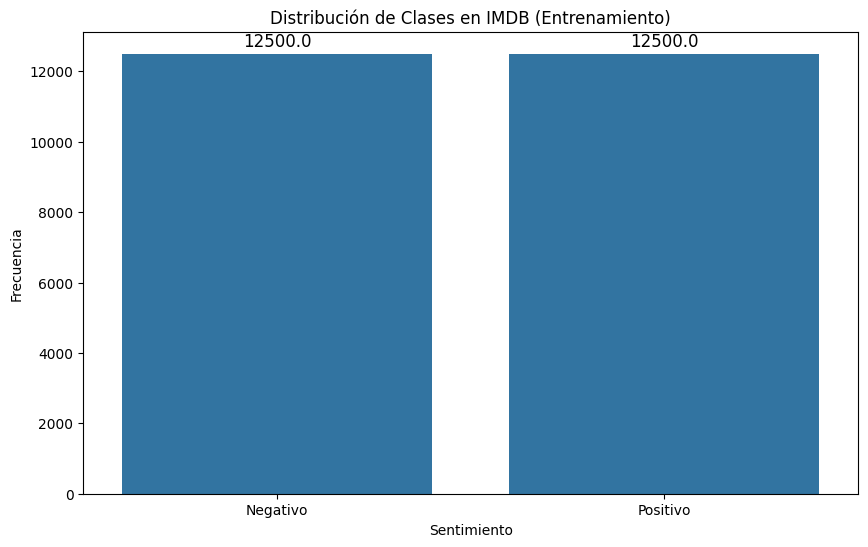

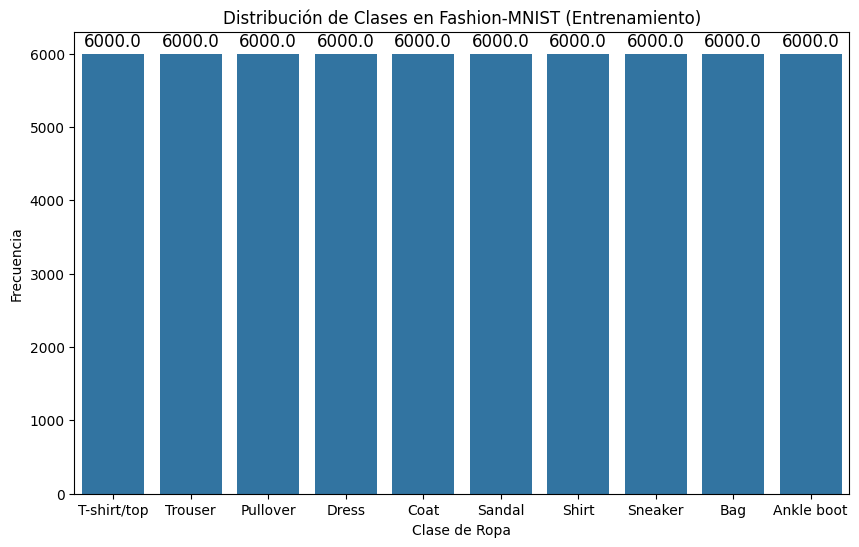

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tensorflow.keras.datasets import imdb, fashion_mnist

# Reload the datasets to get original labels
(X_train_imdb, y_train_imdb), (X_test_imdb, y_test_imdb) = imdb.load_data(num_words=10000)
(X_train_fashion, y_train_fashion), (X_test_fashion, y_test_fashion) = fashion_mnist.load_data()

# Visualizaci√≥n del desbalance de clases en IMDB
plt.figure(figsize=(10, 6))

# Contar las clases de IMDB
ax = sns.countplot(x=y_train_imdb)  # y_train_imdb are the original IMDB labels (0 or 1)
plt.title("Distribuci√≥n de Clases en IMDB (Entrenamiento)")
plt.xlabel("Sentimiento")
plt.ylabel("Frecuencia")
plt.xticks([0, 1], ['Negativo', 'Positivo'])

# A√±adir los valores encima de las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 9), textcoords='offset points')

plt.show()

# Visualizaci√≥n del desbalance de clases en Fashion-MNIST
plt.figure(figsize=(10, 6))

# Contar las clases de Fashion-MNIST (etiquetas de 0 a 9)
ax = sns.countplot(x=y_train_fashion)  # y_train_fashion are the original Fashion-MNIST labels
plt.title("Distribuci√≥n de Clases en Fashion-MNIST (Entrenamiento)")
plt.xlabel("Clase de Ropa")
plt.ylabel("Frecuencia")
plt.xticks(np.arange(10), ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'])

# A√±adir los valores encima de las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 9), textcoords='offset points')

plt.show()

Reducci√≥n de la Arquitectura del Modelo y Fusi√≥n


In [6]:
from tensorflow.keras.layers import Input, Concatenate, Dense, Flatten, Dropout, BatchNormalization, MaxPooling2D, Conv2D
from tensorflow.keras.layers import GlobalAveragePooling1D, MultiHeadAttention, LayerNormalization, Embedding
from tensorflow.keras.models import Model

# Par√°metros
MAX_LEN = 250
EMBED_DIM = 128
NUM_HEADS = 4
FF_DIM = 128
NUM_ENCODER_BLOCKS = 2
NUM_DECODER_BLOCKS = 2
DROPOUT_RATE = 0.3  # Aumentamos el dropout para evitar sobreajuste
VOCAB_SIZE = 10000
NUM_CLASSES_CNN = 10  # N√∫mero de clases en Fashion-MNIST

# Definir las entradas
image_input = Input(shape=(28, 28, 1), name="image_input")  # Dimensiones de las im√°genes
text_input = Input(shape=(MAX_LEN,), name="text_input")  # Longitud de las secuencias de texto

# --- CNN (Im√°genes de Fashion-MNIST) ---
cnn_x = Conv2D(32, (3, 3), activation='relu')(image_input)
cnn_x = BatchNormalization()(cnn_x)
cnn_x = MaxPooling2D((2, 2))(cnn_x)

cnn_x = Conv2D(64, (3, 3), activation='relu')(cnn_x)
cnn_x = BatchNormalization()(cnn_x)
cnn_x = MaxPooling2D((2, 2))(cnn_x)

cnn_x = Conv2D(128, (3, 3), activation='relu')(cnn_x)
cnn_x = BatchNormalization()(cnn_x)
cnn_x = MaxPooling2D((2, 2))(cnn_x)

cnn_x = Flatten()(cnn_x)
cnn_x = Dense(128, activation='relu')(cnn_x)
cnn_output_features = Dropout(DROPOUT_RATE)(cnn_x)  # Dropout para regularizar

# --- Transformer (Texto IMDB) ---
embedding_layer = Embedding(input_dim=VOCAB_SIZE, output_dim=EMBED_DIM, input_length=MAX_LEN, mask_zero=True)
x_enc = embedding_layer(text_input)
x_dec = embedding_layer(text_input)  # Decoder input es tambi√©n la secuencia de texto

def transformer_encoder(inputs):
    attention = MultiHeadAttention(num_heads=NUM_HEADS, key_dim=EMBED_DIM)(inputs, inputs)
    attention = Dropout(DROPOUT_RATE)(attention)
    out1 = LayerNormalization(epsilon=1e-6)(inputs + attention)
    ff = Dense(FF_DIM, activation="relu")(out1)
    ff = Dense(EMBED_DIM)(ff)
    ff = Dropout(DROPOUT_RATE)(ff)
    return LayerNormalization(epsilon=1e-6)(out1 + ff)

def transformer_decoder(inputs, encoder_output):
    attention1 = MultiHeadAttention(num_heads=NUM_HEADS, key_dim=EMBED_DIM)(inputs, inputs)
    attention1 = Dropout(DROPOUT_RATE)(attention1)
    out1 = LayerNormalization(epsilon=1e-6)(inputs + attention1)
    attention2 = MultiHeadAttention(num_heads=NUM_HEADS, key_dim=EMBED_DIM)(out1, encoder_output)
    attention2 = Dropout(DROPOUT_RATE)(attention2)
    out2 = LayerNormalization(epsilon=1e-6)(out1 + attention2)
    ff = Dense(FF_DIM, activation="relu")(out2)
    ff = Dense(EMBED_DIM)(ff)
    ff = Dropout(DROPOUT_RATE)(ff)
    return LayerNormalization(epsilon=1e-6)(out2 + ff)

# Apply encoder and decoder blocks
x_enc_rebuilt = x_enc
for _ in range(NUM_ENCODER_BLOCKS):
    x_enc_rebuilt = transformer_encoder(x_enc_rebuilt)

x_dec_rebuilt = x_dec
for _ in range(NUM_DECODER_BLOCKS):
    x_dec_rebuilt = transformer_decoder(x_dec_rebuilt, x_enc_rebuilt)

transformer_output_features = GlobalAveragePooling1D()(x_dec_rebuilt)
transformer_output_features = Dropout(DROPOUT_RATE)(transformer_output_features)

# --- Fusi√≥n de los Modelos ---
merged = Concatenate()([cnn_output_features, transformer_output_features])

# --- Capa Final de Clasificaci√≥n ---
final_output = Dense(1, activation='sigmoid', name="final_output")(merged)

# --- Crear el modelo fusionado ---
final_model = Model(inputs=[image_input, text_input], outputs=final_output)

# --- Compilar el modelo final ---
final_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# --- Resumen del modelo fusionado ---
final_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_23"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)        ‚îÉ Output Shape      ‚îÉ    Param # ‚îÉ Connected to      ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ text_input          ‚îÇ (None, 250)       ‚îÇ          0 ‚îÇ -                 ‚îÇ
‚îÇ (InputLayer)        ‚îÇ                   ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ embedding           ‚îÇ (None, 250, 128)  ‚îÇ  1,280,000 ‚îÇ text_input[0][0], ‚îÇ
‚îÇ (Embedding)         ‚îÇ                   ‚îÇ            ‚îÇ text_input[0][0]  ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ not_equal           ‚îÇ (None, 250)       ‚îÇ          0 ‚îÇ text_input[0][0]  ‚îÇ
‚îÇ (NotEqual)          ‚îÇ                   ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ multi_head_attenti‚Ä¶ ‚îÇ (None, 250, 128)  ‚îÇ    263,808 ‚îÇ embedding[0][0],  ‚îÇ
‚îÇ (MultiHeadAttentio‚Ä¶ ‚îÇ                   ‚îÇ            ‚îÇ embedding[0][0],  ‚îÇ
‚îÇ                     ‚îÇ                   ‚îÇ            ‚îÇ not_equal[0][0],  ‚îÇ
‚îÇ                     ‚îÇ                   ‚îÇ            ‚îÇ not_equal[0][0]   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_2 (Dropout) ‚îÇ (None, 250, 128)  ‚îÇ          0 ‚îÇ multi_head_atten‚Ä¶ ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ add (Add)           ‚îÇ (None, 250, 128)  ‚îÇ          0 ‚îÇ embedding[0][0],  ‚îÇ
‚îÇ                     ‚îÇ                   ‚îÇ            ‚îÇ dropout_2[0][0]   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ layer_normalization ‚îÇ (None, 250, 128)  ‚îÇ        256 ‚îÇ add[0][0]         ‚îÇ
‚îÇ (LayerNormalizatio‚Ä¶ ‚îÇ                   ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_1 (Dense)     ‚îÇ (None, 250, 128)  ‚îÇ     16,512 ‚îÇ layer_normalizat‚Ä¶ ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_2 (Dense)     ‚îÇ (None, 250, 128)  ‚îÇ     16,512 ‚îÇ dense_1[0][0]     ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚î

 Total params: 3,107,841 (11.86 MB)

 Trainable params: 3,107,393 (11.85 MB)

 Non-trainable params: 448 (1.75 KB)

# Fase 16: Entrenamiento del Modelo

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
938/938 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 7ms/step - accuracy: 0.6400 - loss: 0.9881
Epoch 1: val_loss improved from inf to 0.48750, saving model to /content/drive/MyDrive/fusion/fusion.h5


938/938 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 14s 9ms/step - accuracy: 0.6401 - loss: 0.9878 - val_accuracy: 0.8229 - val_loss: 0.4875
Epoch 2/30
929/938 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 5ms/step - accuracy: 0.8261 - loss: 0.4834
Epoch 2: val_loss improved from 0.48750 to 0.43079, saving model to /content/drive/MyDrive/fusion/fusion.h5


938/938 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13s 6ms/step - accuracy: 0.8262 - loss: 0.4832 - val_accuracy: 0.8439 - val_loss: 0.4308
Epoch 3/30
927/938 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - accuracy: 0.8545 - loss: 0.4063
Epoch 3: val_loss improved from 0.43079 to 0.35948, saving model to /content/drive/MyDrive/fusion/fusion.h5


938/938 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 5ms/step - accuracy: 0.8545 - loss: 0.4062 - val_accuracy: 0.8696 - val_loss: 0.3595
Epoch 4/30
931/938 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - accuracy: 0.8705 - loss: 0.3614
Epoch 4: val_loss improved from 0.35948 to 0.34928, saving model to /content/drive/MyDrive/fusion/fusion.h5


938/938 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 5ms/step - accuracy: 0.8705 - loss: 0.3614 - val_accuracy: 0.8716 - val_loss: 0.3493
Epoch 5/30
933/938 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 5ms/step - accuracy: 0.8859 - loss: 0.3228
Epoch 5: val_loss improved from 0.34928 to 0.32481, saving model to /content/drive/MyDrive/fusion/fusion.h5


938/938 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 6ms/step - accuracy: 0.8859 - loss: 0.3228 - val_accuracy: 0.8837 - val_loss: 0.3248
Epoch 6/30
931/938 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 5ms/step - accuracy: 0.8908 - loss: 0.3015
Epoch 6: val_loss improved from 0.32481 to 0.31500, saving model to /content/drive/MyDrive/fusion/fusion.h5


938/938 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 6ms/step - accuracy: 0.8909 - loss: 0.3015 - val_accuracy: 0.8816 - val_loss: 0.3150
Epoch 7/30
931/938 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - accuracy: 0.8990 - loss: 0.2815
Epoch 7: val_loss did not improve from 0.31500
938/938 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 5ms/step - accuracy: 0.8990 - loss: 0.2815 - val_accuracy: 0.8858 - val_loss: 0.3164
Epoch 8/30
931/938 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 5ms/step - accuracy: 0.9052 - loss: 0.2625
Epoch 8: val_loss improved from 0.31500 to 0.29952, saving model to /content/drive/MyDrive/fusion/fusion.h5


938/938 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 6ms/step - accuracy: 0.9052 - loss: 0.2625 - val_accuracy: 0.8914 - val_loss: 0.2995
Epoch 9/30
931/938 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - accuracy: 0.9124 - loss: 0.2410
Epoch 9: val_loss did not improve from 0.29952
938/938 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 5ms/step - accuracy: 0.9123 - loss: 0.2410 - val_accuracy: 0.8874 - val_loss: 0.3159
Epoch 10/30
937/938 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 5ms/step - accuracy: 0.9155 - loss: 0.2348
Epoch 10: val_loss did not improve from 0.29952
938/938 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 6ms/step - accuracy: 0.9155 - loss: 0.2348 - val_accuracy: 0.8929 - val_loss: 0.3040
Epoch 11/30
932/938 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - accuracy: 0.9226 - loss: 0.2112
Epoch 11: val_loss did not improve from 0.29952
938/93

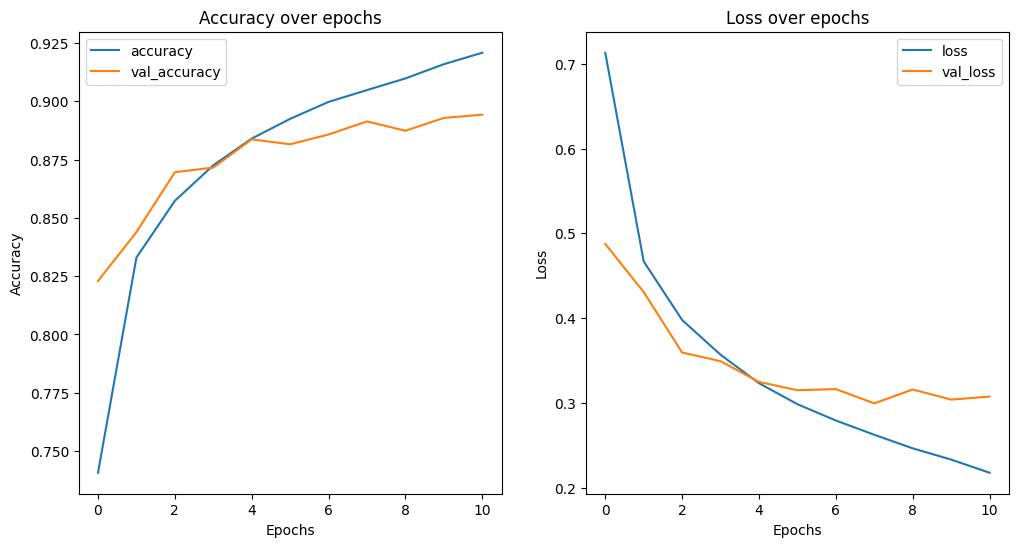

In [9]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
import matplotlib.pyplot as plt
from google.colab import drive
import os

# Montar Google Drive
drive.mount('/content/drive')

# Ruta en Google Drive donde se guardar√° el modelo
checkpoint_dir = '/content/drive/MyDrive/fusion'
os.makedirs(checkpoint_dir, exist_ok=True)

# Cargar y preprocesar los datos
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalizar las im√°genes a valores entre 0 y 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Redimensionar para que tengan un canal √∫nico (grayscale)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Codificar las etiquetas a formato one-hot
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Crear el modelo CNN
model = Sequential()

# Capa 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))

# Capa 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Capa 3
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Aplanado de la salida
model.add(Flatten())

# Capa densa
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout para evitar sobreajuste

# Capa de salida (10 clases)
model.add(Dense(10, activation='softmax'))

# Compilamos el modelo
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callback para guardar el mejor modelo en Google Drive
checkpoint_callback = ModelCheckpoint(
    os.path.join(checkpoint_dir, 'fusion.h5'),
    save_best_only=True,
    monitor='val_loss',
    mode='min',
    verbose=1
)

# Callback para detener el entrenamiento si no hay mejora
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1)

# Callback para TensorBoard
tensorboard_callback = TensorBoard(log_dir='./logs', histogram_freq=1)

# Entrenamos el modelo
history = model.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_test, y_test),
                    callbacks=[checkpoint_callback, early_stopping_callback, tensorboard_callback])

# Visualizamos la precisi√≥n y la p√©rdida
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


# Fase 17: Evaluaci√≥n del Modelo y Matriz de Confusi√≥n

313/313 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 2ms/step - accuracy: 0.8974 - loss: 0.3096
Test Accuracy: 0.8954
Test Loss: 0.2932
313/313 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 2ms/step


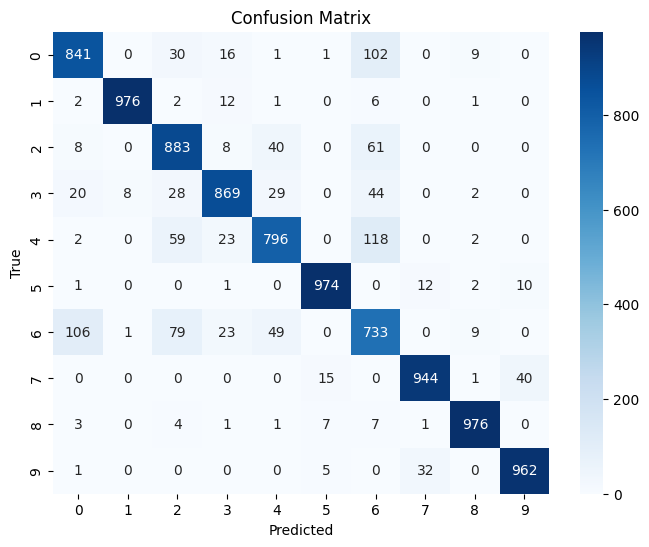

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Cargar el mejor modelo guardado
model.load_weights('/content/drive/MyDrive/fusion/fusion_best_model.h5')

# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Predecir las clases en el conjunto de test
y_pred = model.predict(X_test)
y_pred_classes = tf.argmax(y_pred, axis=1).numpy()
y_true_classes = tf.argmax(y_test, axis=1).numpy()

# Generar la matriz de confusi√≥n
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Visualizar la matriz de confusi√≥n
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[str(i) for i in range(10)], yticklabels=[str(i) for i in range(10)])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Fase 18: Gradio para el modelo de an√°lisis de sentimiento (Transformer)

In [1]:
pip install --upgrade gradio

In [2]:
import gradio as gr
import numpy as np

# Funci√≥n para hacer predicciones con el modelo
def predict_image(image):
    # Convertir la imagen a un array de numpy
    image = np.array(image)

    # Asegurarse de que la imagen tenga la forma adecuada para el modelo
    image = np.expand_dims(image, axis=-1)  # Para asegurar un solo canal (grayscale)
    image = image.astype('float32') / 255.0  # Normalizar la imagen a valores entre 0 y 1
    image = np.expand_dims(image, axis=0)  # A√±adir la dimensi√≥n del batch (1, 28, 28, 1)

    # Predecir usando el modelo (asumiendo que ya tienes un modelo entrenado)
    prediction = model.predict(image)
    predicted_class = np.argmax(prediction)  # Obtener la clase con la mayor probabilidad
    return f"Predicted Class: {predicted_class}"

# Interfaz de Gradio (actualizada)
interface = gr.Interface(
    fn=predict_image,
    inputs=gr.Image(image_mode='L', size=(28, 28)),  # Usamos 'size' en lugar de 'shape'
    outputs='text'
)

interface.launch()


TypeError: Image.__init__() got an unexpected keyword argument 'size'